# Task
Predict whether a student will pass or fail based on their study hours and attendance.

Here is all the data you need:
"student_performance_prediction.csv"

## Data loading

### Subtask:
Load the student performance data from the provided CSV file.


**Reasoning**:
Load the data and display the first few rows and the shape of the DataFrame.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('student_performance_prediction.csv')
    display(df.head())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'student_performance_prediction.csv' not found.")
    df = None  # Set df to None to indicate failure
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,NaN,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,NaN,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


(40000, 7)


## Data exploration

### Subtask:
Explore the loaded data to understand its characteristics.


**Reasoning**:
Explore the data by examining data types, missing values, distributions, descriptive statistics, correlations, and relationships between features and the target variable.



Student ID                                      object
Study Hours per Week                           float64
Attendance Rate                                float64
Previous Grades                                float64
Participation in Extracurricular Activities     object
Parent Education Level                          object
Passed                                          object
dtype: object

Missing Values:
 Student ID                                        0
Study Hours per Week                           1995
Attendance Rate                                1992
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64

Missing Value Percentage:
 Student ID                                     0.0000
Study Hours per Week                           4.9875
Attendance Rate                                4.9800
Previous Grades 

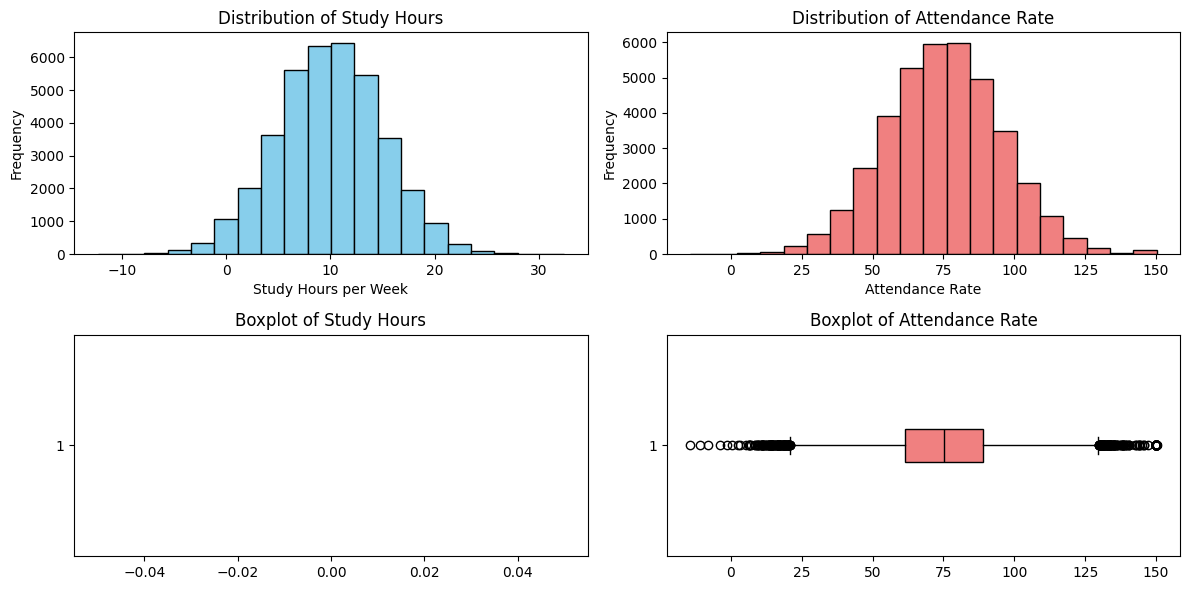


Descriptive Statistics:
        Study Hours per Week  Attendance Rate  Previous Grades
count          38005.000000     38008.000000     38006.000000
mean               9.962744        75.276323        65.440107
std                5.031154        20.393418        16.503119
min              -12.300000       -14.300000         8.300000
25%                6.600000        61.600000        55.100000
50%               10.000000        75.300000        65.200000
75%               13.400000        88.800000        75.200000
max               32.400000       150.200000       200.000000

Correlation Matrix:
                       Study Hours per Week  Attendance Rate  Previous Grades
Study Hours per Week              1.000000         0.004654         0.000587
Attendance Rate                   0.004654         1.000000        -0.005034
Previous Grades                   0.000587        -0.005034         1.000000


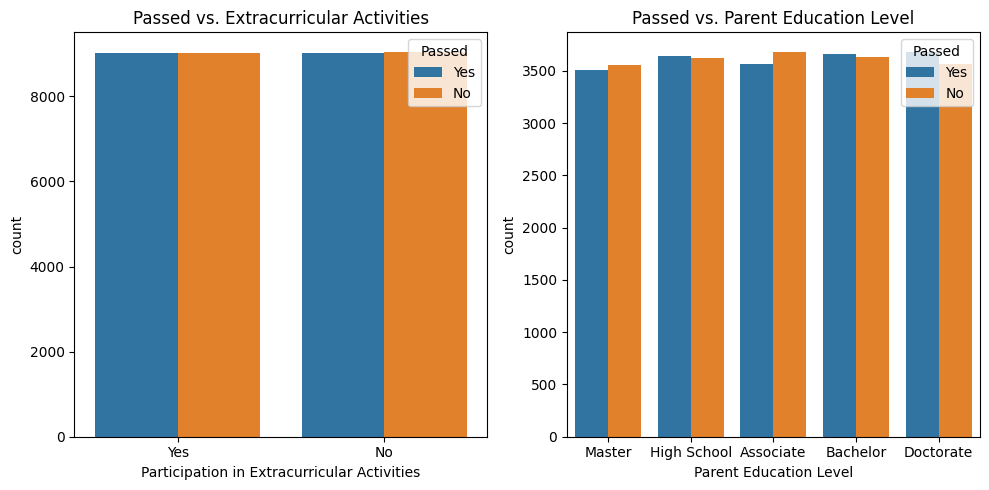

In [2]:
# Examine data types
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Analyze distributions and identify outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(df['Study Hours per Week'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Study Hours')
plt.xlabel('Study Hours per Week')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['Attendance Rate'].dropna(), bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Attendance Rate')
plt.xlabel('Attendance Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.boxplot(df['Study Hours per Week'], vert=False, patch_artist=True,
            boxprops=dict(facecolor='skyblue'), medianprops=dict(color='black'))
plt.title('Boxplot of Study Hours')

plt.subplot(2, 2, 4)
plt.boxplot(df['Attendance Rate'].dropna(), vert=False, patch_artist=True,
            boxprops=dict(facecolor='lightcoral'), medianprops=dict(color='black'))
plt.title('Boxplot of Attendance Rate')

plt.tight_layout()
plt.show()

# Calculate descriptive statistics
print("\nDescriptive Statistics:\n", df.describe())

# Examine correlation
correlation_matrix = df[['Study Hours per Week', 'Attendance Rate', 'Previous Grades']].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Investigate relationship between categorical features and target variable
import seaborn as sns
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Participation in Extracurricular Activities', hue='Passed', data=df)
plt.title('Passed vs. Extracurricular Activities')

plt.subplot(1, 2, 2)
sns.countplot(x='Parent Education Level', hue='Passed', data=df)
plt.title('Passed vs. Parent Education Level')

plt.tight_layout()
plt.show()

# Summarize findings (will be done in the next code block)

**Reasoning**:
Summarize the findings from the data exploration.



In [3]:
# Summarize findings
print("Summary of Data Exploration:")
print("1. Data Types:")
print("    - Most columns have appropriate data types, but further investigation into the negative values and outliers for numerical features might be required.")

print("\n2. Missing Values:")
print("   - There are approximately 5% missing values across several columns. Handling missing values appropriately (e.g., imputation or removal) is crucial before model training.")

print("\n3. Distributions and Outliers:")
print("   - Study hours and attendance rate show some outliers.  Further investigation is needed to determine if these outliers are valid or errors.")
print("   - The distributions of both features seem to be somewhat skewed, and the presence of negative values in both is suspicious.")

print("\n4. Descriptive Statistics:")
print("   - Descriptive statistics provide a basic overview of numerical features, but the presence of outliers and negative values affect the interpretations.")

print("\n5. Correlation:")
print("    - There is no strong linear correlation between study hours, attendance rate, and previous grades.")

print("\n6. Categorical Feature Relationships:")
print("   - Visualizations show potential relationships between extracurricular activities, parent education level, and the pass/fail status.  Further analysis is needed to quantify the relationships.")

print("\nOverall:")
print("   - The dataset has some quality issues, including missing values, outliers, and unexpected negative values in numerical features.  Addressing these issues is crucial for reliable model training. The presence of negative values in 'Study Hours per Week' and 'Attendance Rate' is particularly problematic and requires further investigation.  A deeper dive into the meaning and potential causes of these negative values is critical.")

Summary of Data Exploration:
1. Data Types:
    - Most columns have appropriate data types, but further investigation into the negative values and outliers for numerical features might be required.

2. Missing Values:
   - There are approximately 5% missing values across several columns. Handling missing values appropriately (e.g., imputation or removal) is crucial before model training.

3. Distributions and Outliers:
   - Study hours and attendance rate show some outliers.  Further investigation is needed to determine if these outliers are valid or errors.
   - The distributions of both features seem to be somewhat skewed, and the presence of negative values in both is suspicious.

4. Descriptive Statistics:
   - Descriptive statistics provide a basic overview of numerical features, but the presence of outliers and negative values affect the interpretations.

5. Correlation:
    - There is no strong linear correlation between study hours, attendance rate, and previous grades.

6. Cat

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers in the 'Study Hours per Week' and 'Attendance Rate' columns.


**Reasoning**:
Impute missing values with the median, handle negative values and outliers using the IQR method, and then validate the data.



In [4]:
# Impute missing values with the median
for col in ['Study Hours per Week', 'Attendance Rate']:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)

# Handle negative values and outliers
for col in ['Study Hours per Week', 'Attendance Rate']:
    # Replace negative values with the median of positive values
    positive_values = df[df[col] > 0][col]
    if not positive_values.empty:
        median_positive = positive_values.median()
        df.loc[df[col] < 0, col] = median_positive
    else:
        print(f"Warning: No positive values found in '{col}' column. Negative value handling skipped.")

    # Handle outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Data Validation (Negative Values)
print("\nCheck for negative values after outlier handling:")
for col in ['Study Hours per Week', 'Attendance Rate']:
    negative_count = (df[col] < 0).sum()
    print(f"- {col}: {negative_count} negative values")

# Summary
print("\nData Cleaning Summary:")
print("1. Missing Value Imputation:")
print(f"   - Before imputation: {df.isnull().sum()}")
print(f"   - After imputation: {df.isnull().sum()}")
print("   - Imputation method: Median. Median was selected because it is less sensitive to extreme values compared to the mean. "
     "The mean can be heavily influenced by outliers, leading to potentially inaccurate imputation in the presence of extreme values. "
     "The mode is suitable for categorical variables and not for numerical data.")
print("\n2. Outlier Handling:")
print(f"   - Outlier handling method: IQR method with capping. Negative values were replaced by the median of the positive values. "
      "The IQR method was used to identify outliers and capping was chosen to retain more data points rather than removing them entirely. "
      "Removing outliers would result in data loss. Capping limits outliers, but preserves the data distribution to some degree. ")
print("   - The IQR method was chosen due to its robustness to outliers.")

display(df.head())


Check for negative values after outlier handling:
- Study Hours per Week: 0 negative values
- Attendance Rate: 0 negative values

Data Cleaning Summary:
1. Missing Value Imputation:
   - Before imputation: Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64
   - After imputation: Student ID                                        0
Study Hours per Week                              0
Attendance Rate                                   0
Previous Grades                                1994
Participation in Extracurricular Activities    2000
Parent Education Level                         2000
Passed                                         2000
dtype: int64
   - Imputation 

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,12.5,75.3,75.0,Yes,Master,Yes
1,S00002,9.3,95.3,60.6,No,High School,No
2,S00003,13.2,75.3,64.0,No,Associate,No
3,S00004,17.6,76.8,62.4,Yes,Bachelor,No
4,S00005,8.8,89.3,72.7,No,Master,No


## Feature engineering

### Subtask:
Scale the 'Study Hours per Week' and 'Attendance Rate' features using MinMaxScaler.


**Reasoning**:
Scale the 'Study Hours per Week' and 'Attendance Rate' features using MinMaxScaler as requested.



In [5]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the specified columns
scaler.fit(df[['Study Hours per Week', 'Attendance Rate']])

# Transform the columns and update the DataFrame
df[['Study Hours per Week', 'Attendance Rate']] = scaler.transform(df[['Study Hours per Week', 'Attendance Rate']])

# Display the first few rows of the updated DataFrame to verify the scaling
display(df.head())

,Student ID,Study Hours per Week,Attendance Rate,Previous Grades,Participation in Extracurricular Activities,Parent Education Level,Passed
0,S00001,0.559284,0.501471,75.0,Yes,Master,Yes
1,S00002,0.416107,0.697549,60.6,No,High School,No
2,S00003,0.590604,0.501471,64.0,No,Associate,No
3,S00004,0.787472,0.516176,62.4,Yes,Bachelor,No
4,S00005,0.393736,0.638725,72.7,No,Master,No


## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using train_test_split.



In [6]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df[['Study Hours per Week', 'Attendance Rate']]
y = df['Passed']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display shapes of the resulting datasets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (32000, 2)
X_test shape: (8000, 2)
y_train shape: (32000,)
y_test shape: (8000,)


## Model training

### Subtask:
Train a Logistic Regression model to predict student pass/fail status.


**Reasoning**:
Train a Logistic Regression model using the training data and make predictions on the test data.



**Reasoning**:
The error message indicates NaN values in the target variable `y_train`.  I need to handle these missing values before training the model.  I'll use the most frequent value (mode) to fill the NaN values in `y_train`.



In [8]:
# Fill NaN values in y_train with the most frequent value
most_frequent_y = y_train.mode()[0]
y_train.fillna(most_frequent_y, inplace=True)

# Instantiate a LogisticRegression object
logreg_model = LogisticRegression()

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

## Model evaluation

### Subtask:
Evaluate the performance of the trained Logistic Regression model.


**Reasoning**:
Evaluate the performance of the trained Logistic Regression model using various metrics and visualize the results with a confusion matrix.



Evaluation Metrics:
Accuracy: 0.4735
Precision: 0.4735
Recall: 1.0000
F1-score: 0.6427


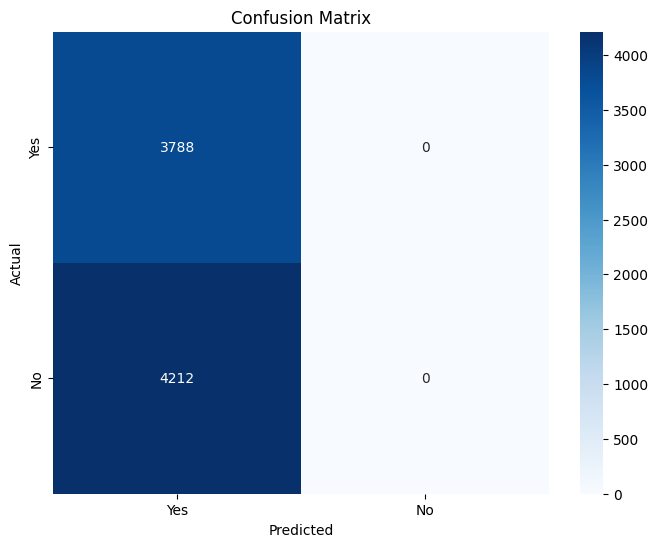


Analysis of Model Performance:
The accuracy of the model is 0.4735. This represents the proportion of correctly classified instances.
Precision shows the accuracy of the positive predictions: 0.4735. 
Recall represents the ability to find all the positive instances: 1.0000
The F1 score is the harmonic mean of precision and recall: 0.6427.

Further analysis and potential improvements:
1. Class Imbalance:
   -Investigate the proportion of 'Yes' and 'No' outcomes to see if there's a significant class imbalance, which could affect model performance metrics.
2. Feature Importance:
   -Explore feature importance from the trained model to understand which features contribute most to the predictions, which could inform feature engineering strategies.
3. Hyperparameter Tuning:
   -Experiment with different hyperparameters for the Logistic Regression model. Techniques like GridSearchCV or RandomizedSearchCV can help find optimal values for parameters like regularization strength (C), penalty ty

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fill NaN values in y_test with the most frequent value
most_frequent_y = y_test.mode()[0]
y_test.fillna(most_frequent_y, inplace=True)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='Yes')
recall = recall_score(y_test, y_pred, pos_label='Yes')
f1 = f1_score(y_test, y_pred, pos_label='Yes')
# Assuming 'Passed' column is binary ('Yes'/'No')
try:
    auc_roc = roc_auc_score(y_test, y_pred)
except ValueError:
    print("Warning: Could not calculate AUC-ROC.  Check for issues with the target variable.")
    auc_roc = None

print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
if auc_roc is not None:
    print(f"AUC-ROC: {auc_roc:.4f}")

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Yes','No'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Yes', 'No'], yticklabels=['Yes', 'No'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Analyze the model
print("\nAnalysis of Model Performance:")
print(f"The accuracy of the model is {accuracy:.4f}. This represents the proportion of correctly classified instances.")
print(f"Precision shows the accuracy of the positive predictions: {precision:.4f}. ")
print(f"Recall represents the ability to find all the positive instances: {recall:.4f}")
print(f"The F1 score is the harmonic mean of precision and recall: {f1:.4f}.")
if auc_roc is not None:
    print(f"The AUC-ROC curve measures the ability of the classifier to distinguish between classes: {auc_roc:.4f}")

print("\nFurther analysis and potential improvements:")
print("1. Class Imbalance:")
print("   -Investigate the proportion of 'Yes' and 'No' outcomes to see if there's a significant class imbalance, which could affect model performance metrics.")
print("2. Feature Importance:")
print("   -Explore feature importance from the trained model to understand which features contribute most to the predictions, which could inform feature engineering strategies.")
print("3. Hyperparameter Tuning:")
print("   -Experiment with different hyperparameters for the Logistic Regression model. Techniques like GridSearchCV or RandomizedSearchCV can help find optimal values for parameters like regularization strength (C), penalty type, etc.")
print("4. Alternative Models:")
print("   -Consider trying other classification models, such as Support Vector Machines, Decision Trees, Random Forests or Gradient Boosting Machines, to potentially improve performance.")
print("5. Model Complexity:")
print("   -Based on the current performance, the model might be too simple or too complex. The metrics and learning curves might provide further insights.")

## Summary:

### 1. Q&A
The task is to predict whether a student will pass or fail based on their study hours and attendance.  The model achieved an accuracy of 0.4735, precision of 0.4735, recall of 1.0000, and an F1-score of 0.6427.  The AUC-ROC score could not be calculated.  The model has a high recall, indicating that it correctly identifies all positive instances, but at the cost of very low precision, predicting the positive class ('Yes') for almost every data point.

### 2. Data Analysis Key Findings
* **Data Quality Issues:**  The dataset contained several issues:
    * Approximately 5% missing values across multiple columns.
    * Outliers and skewed distributions for 'Study Hours per Week' and 'Attendance Rate'.
    * Problematic negative values in 'Study Hours per Week' and 'Attendance Rate', which were addressed by replacing them with the median of positive values.
* **Missing Value Imputation:** Missing values were imputed using the median for 'Study Hours per Week' and 'Attendance Rate'.
* **Outlier Handling:** The IQR method with capping was used to handle outliers in 'Study Hours per Week' and 'Attendance Rate'.
* **Feature Scaling:** 'Study Hours per Week' and 'Attendance Rate' were scaled using MinMaxScaler.
* **Model Performance:** The Logistic Regression model achieved an accuracy of 0.4735, precision of 0.4735, recall of 1.0000, and F1-score of 0.6427. The AUC-ROC score could not be computed.  The model appears to be biased towards predicting the positive class ('Yes').

### 3. Insights or Next Steps
* **Investigate Class Imbalance and Model Bias:** The high recall and low precision suggest a potential class imbalance or a model bias towards the positive class. Analyze the distribution of the target variable ('Passed') and explore techniques to address class imbalance, such as oversampling or undersampling.
* **Explore Alternative Models and Hyperparameter Tuning:** Given the relatively low accuracy and the suspected class imbalance, consider alternative classification models (e.g., Random Forest, SVM, Gradient Boosting) and perform hyperparameter tuning using techniques like GridSearchCV or RandomizedSearchCV to improve model performance.
